In [4]:
%pylab inline
import numpy as np
from pygadgetreader import *
from octopus import density, orbit_cm


Populating the interactive namespace from numpy and matplotlib


In [5]:
#ic_snap = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'pos', 'dm')
#ic_vel = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'vel', 'dm')
#ic_ids = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'pid', 'dm')


fc_snap = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'pos', 'dm')
fc_vel = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'vel', 'dm')
fc_ids = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'pid', 'dm')

Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs


In [6]:
def mw_particles(xyz, vxyz, ids, N_halo):
    id_cut = np.sort(ids)[N_halo]
    index_mw = np.where(ids<id_cut)[0]
    index_lmc = np.where(ids>=id_cut)[0]
    return xyz[index_mw], vxyz[index_mw], xyz[index_lmc], vxyz[index_lmc]

In [7]:
#mw_ic_pos, mw_ic_vel, lmc_ic_pos, lmc_ic_vel = mw_particles(ic_snap, ic_vel, ic_ids, 1000000)
mw_fc_pos, mw_fc_vel, lmc_fc_pos, lmc_fc_vel = mw_particles(fc_snap, fc_vel, fc_ids, 1000000)

In [8]:
#xic_cm, yic_cm, zic_cm, vx_ic_cm, vy_ic_cm, vz_ic_cm = orbit_cm.CM(mw_ic_pos, mw_ic_vel)
xfc_cm, yfc_cm, zfc_cm, vx_fc_cm, vy_fc_cm, vz_fc_cm = orbit_cm.CM(mw_fc_pos, mw_fc_vel)

#print 'ic coordinates: ', xic_cm, yic_cm, zic_cm
print 'fc coordinates: ', xfc_cm, yfc_cm, zfc_cm

fc coordinates:  3.14213492468 33.1085245965 -10.5106429199


In [9]:
# Recenter

#mw_ic_pos[:,0] = mw_ic_pos[:,0] - xic_cm
#mw_ic_pos[:,1] = mw_ic_pos[:,1] - yic_cm
#mw_ic_pos[:,2] = mw_ic_pos[:,2] - zic_cm

mw_fc_pos[:,0] = mw_fc_pos[:,0] - xfc_cm
mw_fc_pos[:,1] = mw_fc_pos[:,1] - yfc_cm
mw_fc_pos[:,2] = mw_fc_pos[:,2] - zfc_cm

In [10]:
r_cuts = [25, 50, 100, 200, 400]

index1_cut_mw = np.where(np.sqrt(((mw_fc_pos[:,0])**2.0) + ((mw_fc_pos[:,1])**2.0) + ((mw_fc_pos[:,2])**2.0))<r_cuts[0])[0] 
index1_cut_all = np.where(np.sqrt(((fc_snap[:,0])**2.0) + ((fc_snap[:,1])**2.0) + ((fc_snap[:,2])**2.0))<r_cuts[0])[0] 

index2_cut_mw = np.where(np.sqrt(((mw_fc_pos[:,0])**2.0) + ((mw_fc_pos[:,1])**2.0) + ((mw_fc_pos[:,2])**2.0))<r_cuts[1])[0] 
index2_cut_all = np.where(np.sqrt(((fc_snap[:,0])**2.0) + ((fc_snap[:,1])**2.0) + ((fc_snap[:,2])**2.0))<r_cuts[1])[0] 

index3_cut_mw = np.where(np.sqrt(((mw_fc_pos[:,0])**2.0) + ((mw_fc_pos[:,1])**2.0) + ((mw_fc_pos[:,2])**2.0))<r_cuts[2])[0] 
index3_cut_all = np.where(np.sqrt(((fc_snap[:,0])**2.0) + ((fc_snap[:,1])**2.0) + ((fc_snap[:,2])**2.0))<r_cuts[2])[0] 

index4_cut_mw = np.where(np.sqrt(((mw_fc_pos[:,0])**2.0) + ((mw_fc_pos[:,1])**2.0) + ((mw_fc_pos[:,2])**2.0))<r_cuts[3])[0] 
index4_cut_all = np.where(np.sqrt(((fc_snap[:,0])**2.0) + ((fc_snap[:,1])**2.0) + ((fc_snap[:,2])**2.0))<r_cuts[3])[0] 

index5_cut_mw = np.where(np.sqrt(((mw_fc_pos[:,0])**2.0) + ((mw_fc_pos[:,1])**2.0) + ((mw_fc_pos[:,2])**2.0))<r_cuts[4])[0] 
index5_cut_all = np.where(np.sqrt(((fc_snap[:,0])**2.0) + ((fc_snap[:,1])**2.0) + ((fc_snap[:,2])**2.0))<r_cuts[4])[0] 

In [12]:
#index_cut_i = np.where(np.sqrt(((mw_ic_pos[:,0])**2.0) + ((mw_ic_pos[:,1])**2.0) + ((mw_ic_pos[:,2])**2.0))<100)[0]
index_cut_f = np.where(np.sqrt(((mw_fc_pos[:,0])**2.0) + ((mw_fc_pos[:,1])**2.0) + ((mw_fc_pos[:,2])**2.0))<40)[0]
index_cut_f_all = np.where(np.sqrt(((fc_snap[:,0])**2.0) + ((fc_snap[:,1])**2.0) + ((fc_snap[:,2])**2.0))<40)[0]


#mw_ic_pos = mw_ic_pos[index_cut_i]
mw_fc_pos1 = mw_fc_pos[index1_cut_mw]
all_fc_pos1 = fc_snap[index1_cut_all]

mw_fc_pos2 = mw_fc_pos[index2_cut_mw]
all_fc_pos2 = fc_snap[index2_cut_all]

mw_fc_pos3 = mw_fc_pos[index3_cut_mw]
all_fc_pos3 = fc_snap[index3_cut_all]

mw_fc_pos4 = mw_fc_pos[index4_cut_mw]
all_fc_pos4 = fc_snap[index4_cut_all]

mw_fc_pos5 = mw_fc_pos[index5_cut_mw]
all_fc_pos5 = fc_snap[index5_cut_all]

#mw_ic_vel = mw_ic_vel[index_cut_i]
#mw_fc_vel = mw_fc_vel[index_cut_f]

(-100, 100)

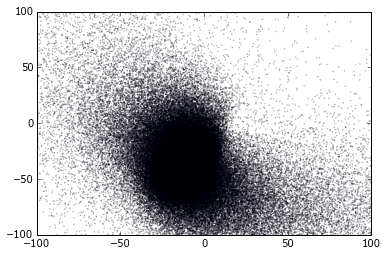

In [7]:
slides_x = np.where((lmc_fc_pos[:,0]<10) & (lmc_fc_pos[:,0]>-10))[0]
scatter(lmc_fc_pos[slides_x,1], lmc_fc_pos[slides_x,2], s=0.1, alpha=0.5)
xlim(-100, 100)
ylim(-100, 100)
#axis('equal')

In [15]:
def slicing(xyz, dr, r, direction=0):
    index_slice = np.where((xyz[:,direction]<r) & (xyz[:,direction]>r-dr))[0]
    return xyz[index_slice,0], xyz[index_slice,1], xyz[index_slice,2]

In [16]:
mw_slice_x1, mw_slice_y1, mw_slice_z1 = slicing(mw_fc_pos1, 20, 10)
all_slice_x1, all_slice_y1, all_slice_z1 = slicing(all_fc_pos1, 20, 10)

mw_slice_x2, mw_slice_y2, mw_slice_z2 = slicing(mw_fc_pos2, 20, 10)
all_slice_x2, all_slice_y2, all_slice_z2 = slicing(all_fc_pos2, 20, 10)

mw_slice_x3, mw_slice_y3, mw_slice_z3 = slicing(mw_fc_pos3, 20, 10)
all_slice_x3, all_slice_y3, all_slice_z3 = slicing(all_fc_pos3, 20, 10)

mw_slice_x4, mw_slice_y4, mw_slice_z4 = slicing(mw_fc_pos4, 20, 10)
all_slice_x4, all_slice_y4, all_slice_z4 = slicing(all_fc_pos4, 20, 10)

mw_slice_x5, mw_slice_y5, mw_slice_z5 = slicing(mw_fc_pos5, 20, 10)
all_slice_x5, all_slice_y5, all_slice_z5 = slicing(all_fc_pos5, 20, 10)


#rho_ic2 = density.grid(mw_slice_y, mw_slice_z, mw_slice_x, 100)



In [17]:
rho_ic1_mw = density.grid(mw_slice_y1, mw_slice_z1, mw_slice_x1, 100)
rho_ic1_all = density.grid(all_slice_y1, all_slice_z1, all_slice_x1, 100)

rho_ic2_mw = density.grid(mw_slice_y2, mw_slice_z2, mw_slice_x2, 100)
rho_ic2_all = density.grid(all_slice_y2, all_slice_z2, all_slice_x2, 100)

rho_ic3_mw = density.grid(mw_slice_y3, mw_slice_z3, mw_slice_x3, 100)
rho_ic3_all = density.grid(all_slice_y3, all_slice_z3, all_slice_x3, 100)

rho_ic4_mw = density.grid(mw_slice_y4, mw_slice_z4, mw_slice_x4, 100)
rho_ic4_all = density.grid(all_slice_y4, all_slice_z4, all_slice_x4, 100)

rho_ic5_mw = density.grid(mw_slice_y5, mw_slice_z5, mw_slice_x5, 100)
rho_ic5_all = density.grid(all_slice_y5, all_slice_z5, all_slice_x5, 100)


In [19]:
all_sy1 = np.linspace(min(all_slice_y1), max(all_slice_y1), 100)
all_sz1 = np.linspace(min(all_slice_z1), max(all_slice_z1), 100)

all_sy2 = np.linspace(min(all_slice_y2), max(all_slice_y2), 100)
all_sz2 = np.linspace(min(all_slice_z2), max(all_slice_z2), 100)

all_sy3 = np.linspace(min(all_slice_y3), max(all_slice_y3), 100)
all_sz3 = np.linspace(min(all_slice_z3), max(all_slice_z3), 100)

all_sy4 = np.linspace(min(all_slice_y4), max(all_slice_y4), 100)
all_sz4 = np.linspace(min(all_slice_z4), max(all_slice_z4), 100)

all_sy5 = np.linspace(min(all_slice_y5), max(all_slice_y5), 100)
all_sz5 = np.linspace(min(all_slice_z5), max(all_slice_z5), 100)


mw_sy1 = np.linspace(min(mw_slice_y1), max(mw_slice_y1), 100)
mw_sz1 = np.linspace(min(mw_slice_z1), max(mw_slice_z1), 100)

mw_sy2 = np.linspace(min(mw_slice_y2), max(mw_slice_y2), 100)
mw_sz2 = np.linspace(min(mw_slice_z2), max(mw_slice_z2), 100)

mw_sy3 = np.linspace(min(mw_slice_y3), max(mw_slice_y3), 100)
mw_sz3 = np.linspace(min(mw_slice_z3), max(mw_slice_z3), 100)

mw_sy4 = np.linspace(min(mw_slice_y4), max(mw_slice_y4), 100)
mw_sz4 = np.linspace(min(mw_slice_z4), max(mw_slice_z4), 100)

mw_sy5 = np.linspace(min(mw_slice_y5), max(mw_slice_y5), 100)
mw_sz5 = np.linspace(min(mw_slice_z5), max(mw_slice_z5), 100)

<matplotlib.contour.QuadContourSet instance at 0x7fd3436976c8>

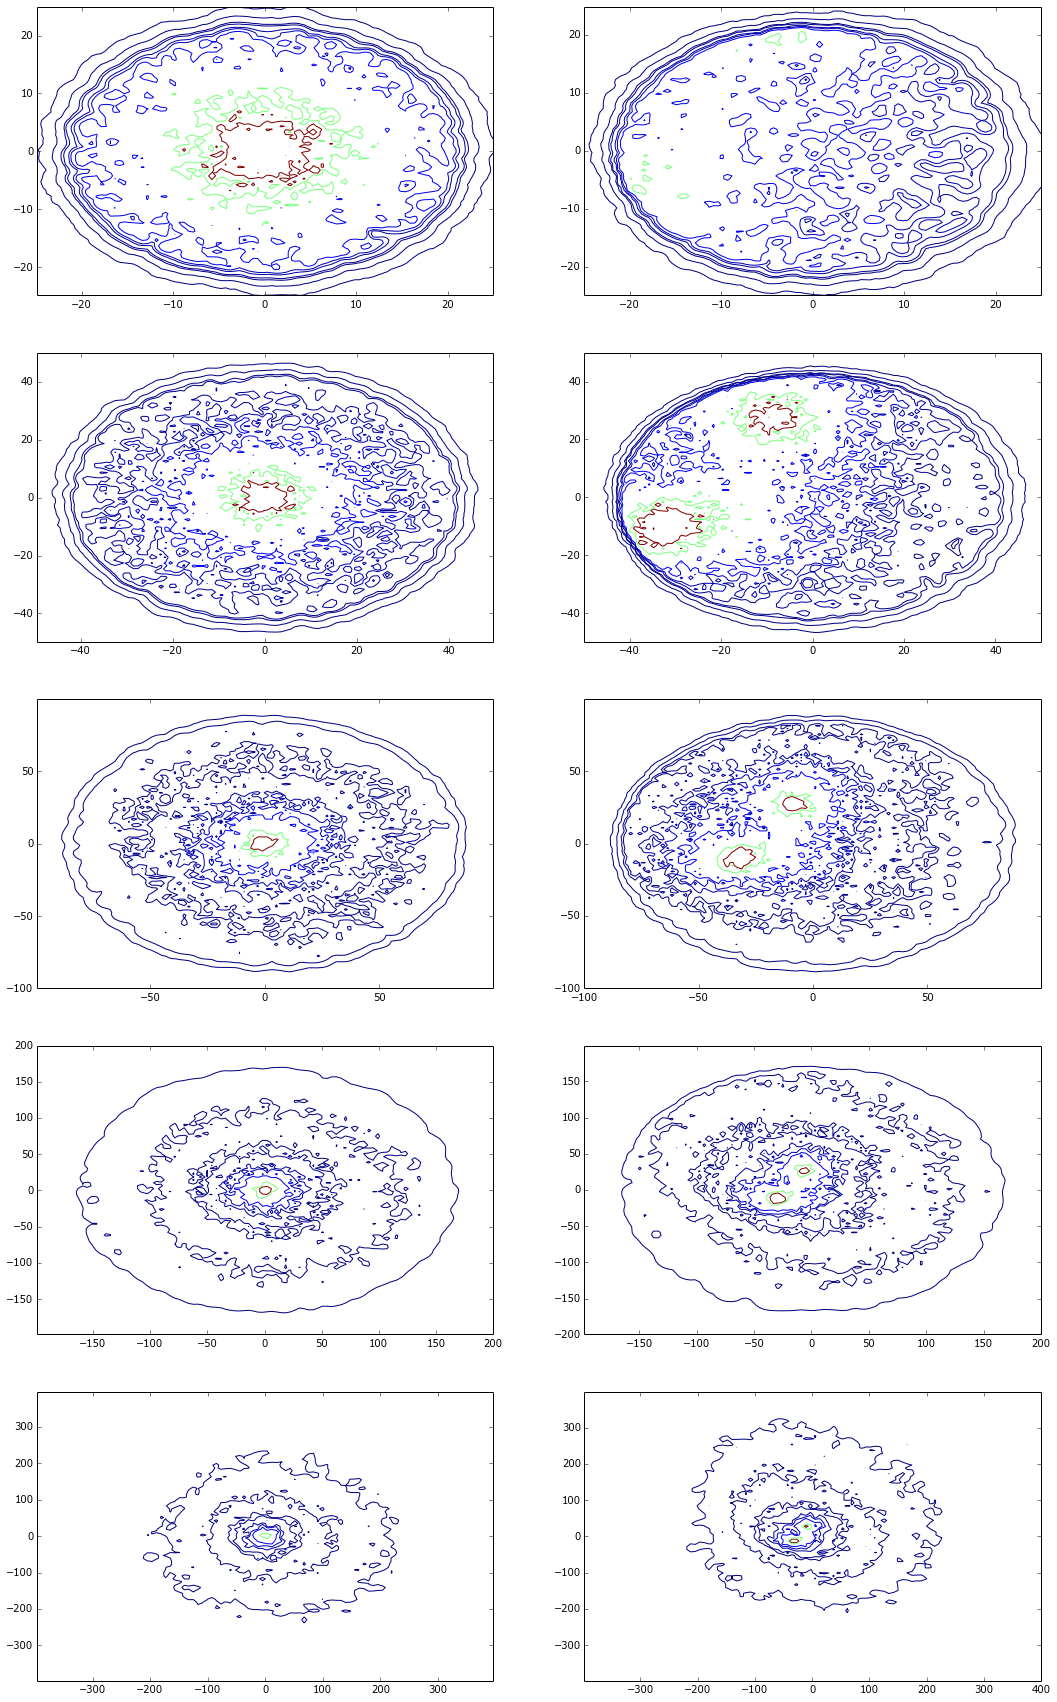

In [22]:
levels = [10, 5, 1, 0.5, 0.3, 0.1, 0.06, 0.01, 0.001]


figure(figsize=(18,30))

subplot(5, 2, 1)
contour(mw_sy1, mw_sz1, rho_ic1_mw, levels=levels)

subplot(5, 2, 2)
contour(all_sy1, all_sz1, rho_ic1_all, levels=levels)

subplot(5, 2, 3)
contour(mw_sy2, mw_sz2, rho_ic2_mw, levels=levels)

subplot(5, 2, 4)
contour(all_sy2, all_sz2, rho_ic2_all, levels=levels)

subplot(5, 2, 5)
contour(mw_sy3, mw_sz3, rho_ic3_mw, levels=levels)

subplot(5, 2, 6)
contour(all_sy3, all_sz3, rho_ic3_all, levels=levels)

subplot(5, 2, 7)
contour(mw_sy4, mw_sz4, rho_ic4_mw, levels=levels)

subplot(5, 2, 8)
contour(all_sy4, all_sz4, rho_ic4_all, levels=levels)

subplot(5, 2, 9)
contour(mw_sy5, mw_sz5, rho_ic5_mw, levels=levels)

subplot(5, 2, 10)
contour(all_sy5, all_sz5, rho_ic5_all, levels=levels)

In [50]:
print np.max(rho_ic), np.min(rho_ic2)

11.5595029679 4.88750393896e-10


<matplotlib.contour.QuadContourSet instance at 0x7ff188825fc8>

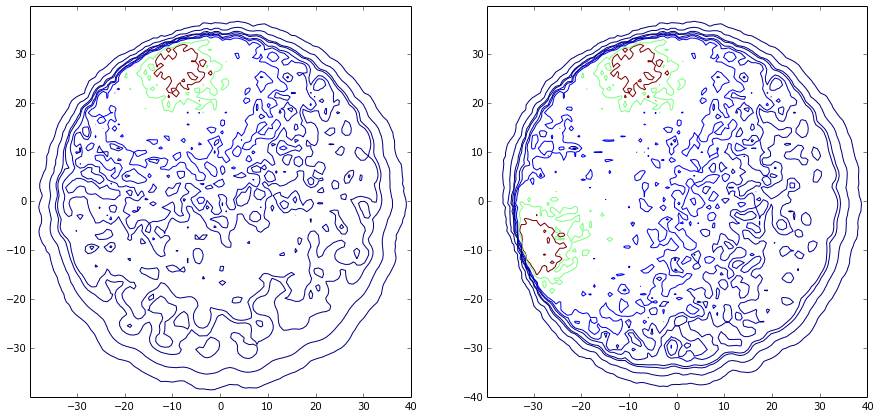

In [84]:
figure(figsize=(15,7))
subplot(1, 2, 1)
levels = [10, 5, 1, 0.5, 0.3, 0.1, 0.06, 0.01, 0.001]
contour(mw_sy, mw_sz, rho_ic2, levels=levels)

subplot(1, 2, 2)
levels = [10, 5, 1, 0.5, 0.3, 0.1, 0.06, 0.01, 0.001]
contour(all_sy, all_sz, rho_ic2_all, levels=levels)

In [81]:
slices = np.linspace(-40, 50, 10)
print slices


[-40. -30. -20. -10.   0.  10.  20.  30.  40.  50.]


In [ ]:
for i in range(len(slices)):
    print i
    xyz_ic = slicing(mw_ic_pos, 1, slices[i], 0)
    rho_ic = density.grid(xyz_ic[1], xyz_ic[2], xyz_ic[0], 100)
    xyz_fc = slicing(mw_fc_pos, 1, slices[i], 0)
    rho_fc = density.grid(xyz_fc[1], xyz_fc[2], xyz_fc[0], 100)
    rho_rate = rho_ic/rho_fc
    figure(figsize=(26, 10))
    subplot(1, 3, 1)
    title('$\mathrm{Isolated\ MW\ t=i}$', fontsize=25)
    imshow(np.log10(rho_ic.T), origin='lower', 
           extent=[-100, 100, -100, 100], 
           cmap='magma',vmin=-9, vmax=2)
    xlabel('$Y$', fontsize=25)
    ylabel('$Z$', fontsize=25)

    colorbar()
    subplot(1, 3, 2)
    title('$\mathrm{Isolated\ MW\ t=f }$', fontsize=25)
    imshow(np.log10(rho_fc.T), origin='lower', 
           extent=[-100, 100, -100, 100], 
           cmap='magma',vmin=-9, vmax=2)
    xlabel('$Y$', fontsize=25)
    ylabel('$Z$', fontsize=25)

    colorbar()
    subplot(1, 3, 3)
    title('$\mathrm{initial/final}$', fontsize=25)
    imshow(np.log10(rho_rate.T), origin='lower', 
           extent=[-100, 100, -100, 100], 
           cmap='magma',vmin=-1, vmax=1)
    colorbar()
    xlabel('$Y$', fontsize=25)
    ylabel('$Z$', fontsize=25)
    
    savefig('slices/MWwakes_{}.png'.format(i))
    clf()

0
1

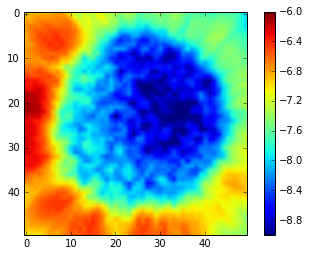

In [29]:
imshow(np.log10(rho_ic.T), vmin=-9, vmax=-6)
colorbar()

In [35]:
# phase space
r_i = np.sqrt(ic_snap[:,0]**2.0 + ic_snap[:,1]**2.0 + ic_snap[:,2]**2.0)
r_f = np.sqrt(fc_snap[:,0]**2.0 + fc_snap[:,1]**2.0 + fc_snap[:,2]**2.0)
v_i = np.sqrt(ic_vel[:,0]**2.0 + ic_vel[:,1]**2.0 + ic_vel[:,2]**2.0)
v_f = np.sqrt(fc_vel[:,0]**2.0 + fc_vel[:,1]**2.0 + fc_vel[:,2]**2.0)


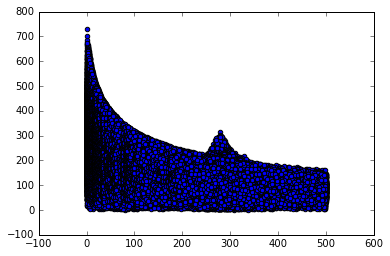

In [36]:
scatter(r_i, v_i, s=0.1)

In [23]:
x_test = np.zeros((3, 3, 3))

In [24]:
print x_test

[[[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]]


In [25]:
x_test[:,:,0]

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [26]:
x_test[:][:][0]

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])